In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Serial

[Text(0.5, 47.24444444444444, '')]

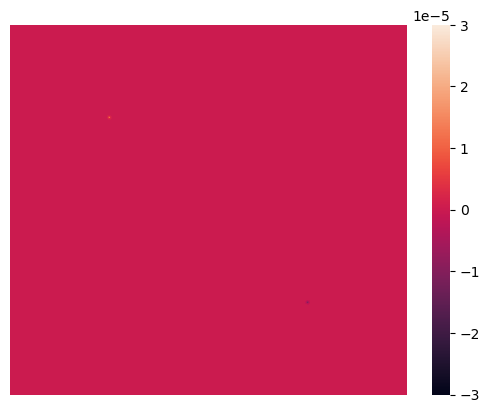

In [3]:
serial = np.loadtxt("matrizes_resultantes/array_serial.csv", delimiter=",", dtype=str)
serial = [float(serial[i]) for i in range(len(serial) - 1)]

serial = np.array(serial)
dim = int((len(serial)) ** 0.5)

heat_mat = serial.reshape((dim, dim))

ax = sns.heatmap(heat_mat, xticklabels=False, yticklabels=False)
ax.set(xlabel="")

# MPI

[Text(0.5, 47.24444444444444, 'erro maximo = 0.0')]

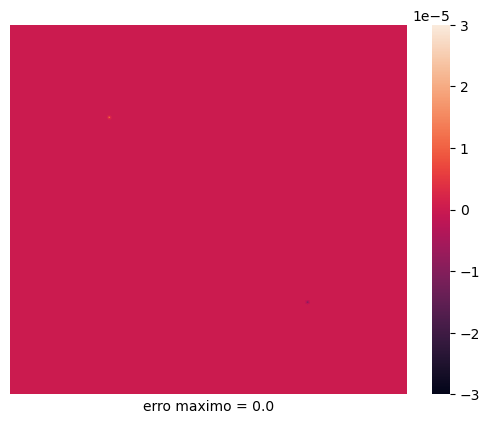

In [5]:
n_proc = 4

parallel = []
for i in range(n_proc):
    a = np.loadtxt("matrizes_resultantes/array_mpi_{:d}.csv".format(i),
                    delimiter=",", dtype=str)
    
    for j in range(len(a)-1):
        parallel.append(float(a[j]))

parallel = np.array(parallel)

RSE = []

for i in range(len(serial)):
    if(serial[i]!=0):
        RSE.append((((parallel[i]-serial[i]))**2)**0.5)

max_RSE = np.max(RSE)

dim = int((len(parallel))**0.5)

heat_mat = parallel.reshape((dim,dim))

ax = sns.heatmap(heat_mat,xticklabels=False, yticklabels=False)
ax.set(xlabel="erro maximo = {}".format(max_RSE))

# OMP

[Text(0.5, 47.24444444444444, 'erro maximo = 3.0000000000000018e-06')]

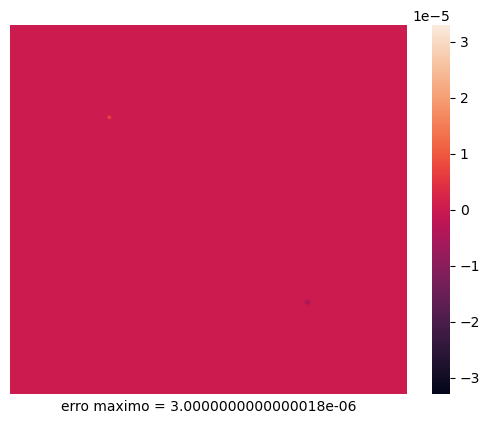

In [6]:
parallel = np.loadtxt("matrizes_resultantes/array_omp.csv",
                 delimiter=",", dtype=str)
parallel = [float(parallel[i]) for i in range(len(parallel)-1)]

parallel = np.array(parallel)

RSE = []

for i in range(len(serial)):
    if(serial[i]!=0):
        RSE.append((((parallel[i]-serial[i]))**2)**0.5)

max_RSE = np.max(RSE)

dim = int((len(parallel))**0.5)

heat_mat = parallel.reshape((dim,dim))

ax = sns.heatmap(heat_mat,xticklabels=False, yticklabels=False)
ax.set(xlabel="erro maximo = {}".format(max_RSE))